In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv(r"C:\Users\Welcome\Desktop\shivam\house_price_india_extended.csv")
df.head()

,House ID,Location,Area (sqft),Bedrooms,Bathrooms,Price (INR),Furnished,Parking Spaces,Age of House (years),Nearby Schools,Crime Rate,Transport Accessibility
0,H-1001,Hyderabad,800.0,4.0,3.0,7000000.0,No,NaN,44.0,0.0,NaN,Excellent
1,H-1002,Bangalore,1800.0,1.0,NaN,10000000.0,NaN,3.0,12.0,1.0,NaN,Poor
2,H-1003,Delhi,1500.0,NaN,NaN,NaN,NaN,0.0,26.0,2.0,NaN,Excellent
3,H-1004,Jaipur,2500.0,3.0,3.0,7000000.0,No,3.0,12.0,2.0,NaN,Good
4,H-1005,Pune,2500.0,3.0,NaN,NaN,NaN,3.0,38.0,NaN,NaN,Good


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)
X = df[['Area (sqft)', 'Bedrooms', 'Bathrooms', 'Parking Spaces', 'Age of House (years)', 'Nearby Schools']]
y = df['Price (INR)'].copy()
X.fillna(0) 
y.fillna(y.median())


0      7000000.0
1     10000000.0
2      7000000.0
3      7000000.0
4      7000000.0
         ...    
95    15000000.0
96     5000000.0
97    15000000.0
98     7000000.0
99     7000000.0
Name: Price (INR), Length: 100, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


In [25]:
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 14447056870177.828
Test MSE: 18232031579006.504


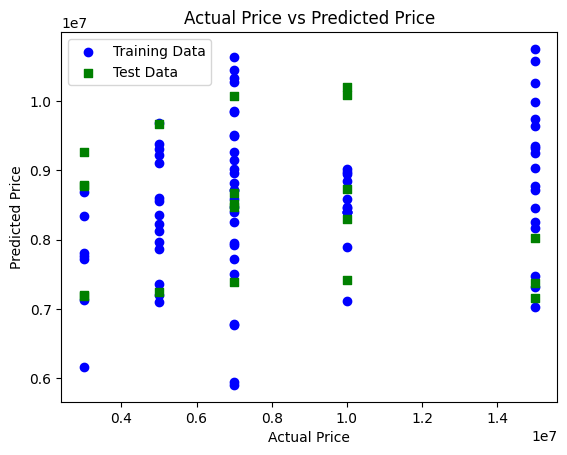

In [26]:
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training Data')
plt.scatter(y_test, y_test_pred, c='green', marker='s', label='Test Data')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.legend(loc='upper left')
plt.show()